In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from pathlib import Path

The data is located in the path below:

In [ ]:
PATH = Path('/content/drive/MyDrive/Fasthack20201209/Kringlan/Data')

There are several different data files:

In [ ]:
ls {PATH}

trend_VÄRME_VP2_KB2_WPP.csv                 trend_VENTILATION_LB05_WPP.csv
trend_VÄRME_VS2_VV2_KV2_WPP.csv             trend_VENTILATION_LB07_WPP.csv
trend_VENTILATION_GARAGEFLÄKTAR_WPP.csv     trend_VENTILATION_LB10_WPP.csv
trend_VENTILATION_LB04_WPP-2.csv            trend_VENTILATION_LB11_WPP.csv
trend_VENTILATION_LB05_BRANDSPJÄLL_WPP.csv  trend_VENTILATION_LB13_WPP.csv


Let us load one of them and inspect its contents:

In [ ]:
df = pd.read_csv(PATH / 'trend_VENTILATION_GARAGEFLÄKTAR_WPP.csv', sep=';', decimal=',', parse_dates=['timestamp'])
print(df)
df.info()

                timestamp  LB12_FF01_OP  ...  UTE_GT31_PV  UTE_GT31_PV1
0     2019-11-01 10:58:00          10.0  ...         0.63         990.3
1     2019-11-01 11:08:00          10.0  ...         0.82         990.3
2     2019-11-01 11:18:00          10.0  ...         1.01         990.3
3     2019-11-01 11:28:00          10.0  ...         1.22         990.3
4     2019-11-01 11:38:00          10.0  ...         1.59         990.3
...                   ...           ...  ...          ...           ...
56012 2020-11-24 10:18:00          10.0  ...         3.10         989.4
56013 2020-11-24 10:28:00          10.0  ...         3.20         989.4
56014 2020-11-24 10:38:00          10.0  ...         3.49         989.4
56015 2020-11-24 10:48:00          10.0  ...         3.68         989.3
56016 2020-11-24 10:58:00          10.0  ...         3.68         989.3

[56017 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56017 entries, 0 to 56016
Data columns (total 18 columns):


### Print the colums


In [ ]:
df.columns

Index(['timestamp', 'LB12_FF01_OP', 'LB06_FF01_OP', 'LB08_FF01_OP',
       'LB12_GF41_PV', 'LB06_GF41_PV', 'LB08_GF41_PV', 'LB12_GT41_PV',
       'LB06_GT41_PV', 'LB08_GT41_PV', 'LB08_GQ51_PV', 'LB08_GQ51_PV1',
       'LB06_GQ51_PV', 'LB06_GQ51_PV1', 'LB12_GQ51_PV', 'LB12_GQ51_PV1',
       'UTE_GT31_PV', 'UTE_GT31_PV1'],
      dtype='object')

Here you can see all the different data series for the Garage. Try picking one of the columns and print the values together with the timestamps:


In [ ]:
gt41_pv = df[['timestamp','LB08_GT41_PV','LB08_GQ51_PV1']][:3000]
gt41_pv

,timestamp,LB08_GT41_PV,LB08_GQ51_PV1
0,2019-11-01 10:58:00,15.44,462.0
1,2019-11-01 11:08:00,15.52,458.2
2,2019-11-01 11:18:00,15.37,454.0
3,2019-11-01 11:28:00,15.43,452.2
4,2019-11-01 11:38:00,15.51,450.4
...,...,...,...
2995,2019-11-22 06:08:00,16.62,412.0
2996,2019-11-22 06:18:00,16.55,411.0
2997,2019-11-22 06:28:00,16.58,410.0
2998,2019-11-22 06:38:00,16.65,408.0


### Plot some of the data

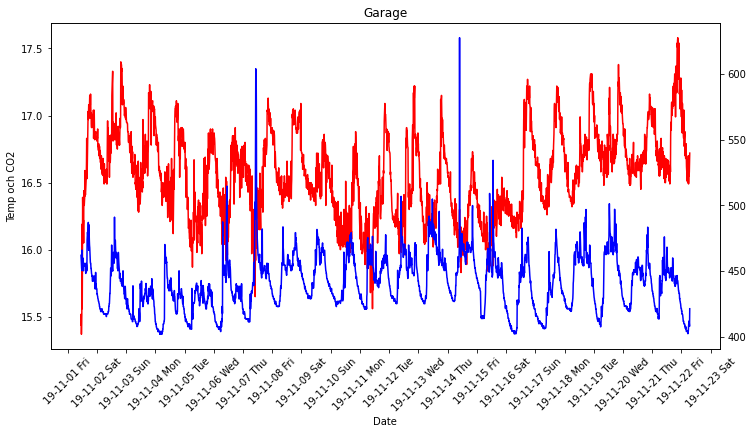

In [ ]:
%matplotlib inline
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Temp och CO2",
       title="Garage")

date_form = DateFormatter("%y-%m-%d %a")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.plot(gt41_pv['timestamp'],
         gt41_pv['LB08_GT41_PV'],
         color='red')

ax2 = ax.twinx()
ax2.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_locator(mdates.DayLocator())

plt.plot(gt41_pv['timestamp'],
         gt41_pv['LB08_GQ51_PV1'],
         color='blue')


plt.show()